# Homework 2: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1  (50 points)
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`.  How does that affect your results?  Use a random seed of 42 for all.


## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!)  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear to cloudy on the day that you started. 


# Homework 2: Solutions

## Problem 1 
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('risaliti_quasar_table.csv')
x=df['logfuv']
y=df['logfxr']

In [30]:
#Pairs bootstrap example
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

[ 0.77125266  0.86047201]


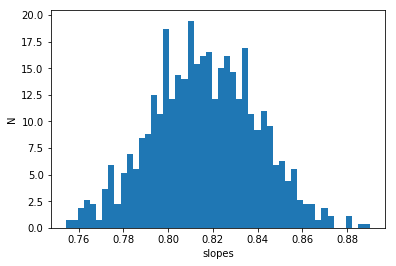

In [31]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x,y,size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slopes')
_ = plt.ylabel('N')
plt.show()

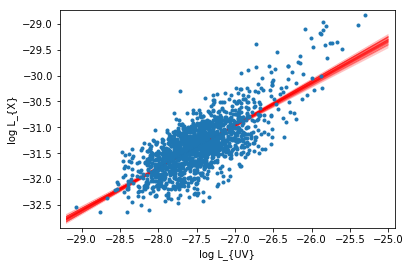

In [32]:
# Generate array of x-values for bootstrap lines: x
xgrid = np.array([-29.2,-25])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(xgrid, bs_slope_reps[i]*xgrid + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(x,y,marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('log L_{UV}')
_ = plt.ylabel('log L_{X}')
plt.margins(0.02)
plt.show()

## Problem 2
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`.  How does that affect your results?  Use a random seed of 42 for all.

In [1]:
#Load up the algorithms we are going to need.
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
np.random.seed(42)

In [2]:
N = 3 #We'll change this to 10 later and run again.
mu = 1.0
sigma = 0.2 
sample = norm(mu, sigma).rvs(N)
print(sample)

[ 1.09934283  0.97234714  1.12953771]


In [3]:
muGrid = np.linspace(0,2,1000) 

L = []
#Loop over number of entries in sample (using "enumerate" might be helpful)
for i,m in enumerate(sample):
    L.append(norm.pdf(muGrid,loc=sample[i],scale=sigma))
    
Lall = np.vstack(L)
print(Lall.shape)
Lprod = Lall.prod(axis=0)
print(Lprod.shape)

(3, 1000)
(1000,)


Likelihood is maximized at 1.067


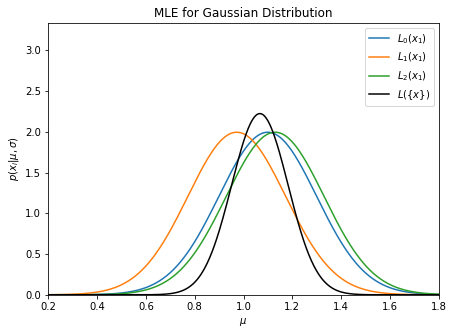

In [4]:
# plot
fig, ax = plt.subplots(figsize=(7, 5))
for j in np.arange(N):
    plt.plot(muGrid, L[j], ls='-', label=r'$L_{0:d}(x_1)$'.format(j))

plt.plot(muGrid, Lprod/N, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, (Lprod/j).max())
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

idx = np.argsort(Lprod)
print("Likelihood is maximized at %.3f" % muGrid[idx[-1]])

[ 1.09934283  0.97234714  1.12953771  1.30460597  0.95316933  0.95317261
  1.31584256  1.15348695  0.90610512  1.10851201]
(10, 1000)
(1000,)
Likelihood is maximized at 1.089


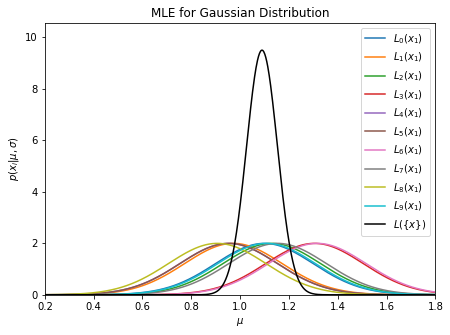

In [5]:
np.random.seed(42)
N = 10 #We'll change this to 10 later and run again.
mu = 1.0
sigma = 0.2 
sample = norm(mu, sigma).rvs(N)
print(sample)
muGrid = np.linspace(0,2,1000) 

L = []
#Loop over number of entries in sample (using "enumerate" might be helpful)
for i,m in enumerate(sample):
    L.append(norm.pdf(muGrid,loc=sample[i],scale=sigma))
    
Lall = np.vstack(L)
print(Lall.shape)
Lprod = Lall.prod(axis=0)
print(Lprod.shape)
# plot
fig, ax = plt.subplots(figsize=(7, 5))
for j in np.arange(N):
    plt.plot(muGrid, L[j], ls='-', label=r'$L_{0:d}(x_1)$'.format(j))

plt.plot(muGrid, Lprod/N, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, (Lprod/j).max())
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

idx = np.argsort(Lprod)
print("Likelihood is maximized at %.3f" % muGrid[idx[-1]])

In [142]:
### Starting with example from class, see what happens if you add more points and 
### if I told you that mu>0.9?

muGrid = np.linspace(0,2,1000) 
muMin = 1.1
mask = muGrid < muMin

L = []
#Loop over number of entries in sample (using "enumerate" might be helpful)
for i,m in enumerate(sample):
    Lone = norm.pdf(muGrid,loc=sample[i],scale=sigma)
    Lone[mask] = 0
    L.append(Lone)

Lall = np.vstack(L)
print(Lall.shape)
Lprod = Lall.prod(axis=0)
print(Lprod.shape)

(10, 1000)
(1000,)


Likelihood is maximized at 1.101


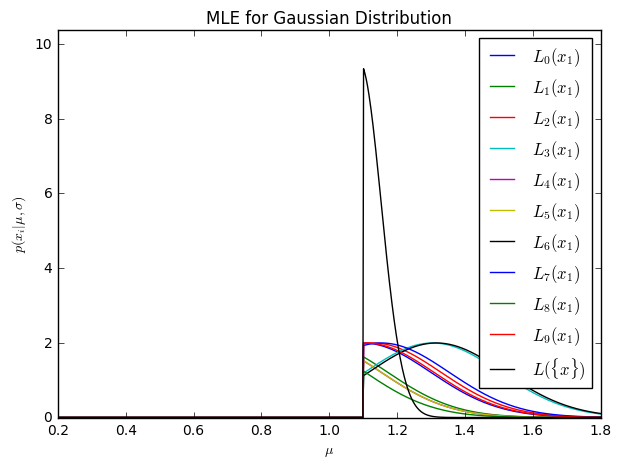

In [143]:
# plot
fig, ax = plt.subplots(figsize=(7, 5))
for j in np.arange(N):
    plt.plot(muGrid, L[j], ls='-', label=r'$L_{0:d}(x_1)$'.format(j))

plt.plot(muGrid, Lprod/N, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, (Lprod/j).max())
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

idx = np.argsort(Lprod)
print("Likelihood is maximized at %.3f" % muGrid[idx[-1]])

## Problem 3

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!)  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear to cloudy on the day that you started. 

Let's say that you are an astronomer and you want to know how likely it is that tomorrow night will be clear given the weather tonight (clear or cloudy).  From past history, you know that:

$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$
which means that
$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have
$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$
which means that
$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$

(That is, you don't live in Philadelphia.)

We can start with the sky conditions today and make predictions going forward.  This will look like a big decision tree.  After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at

$$p({\rm clear}) = 0.83,$$
and 
$$p({\rm cloudy}) = 0.17.$$   

The steps that we have taken in this process are a **Markov Chain**.

0.8298
[ 1.  1.  1. ...,  1.  0.  1.]


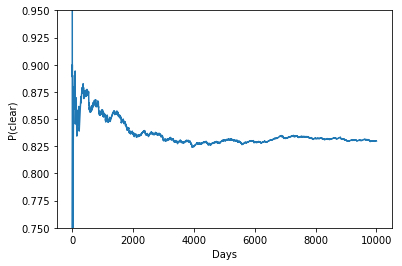

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N=10000
today = 1 # clear=1 cloudy=0
tomorrow = -1
cleardays = 0
chain = []
chain = np.array([])
pclearall = np.array([])
t = np.arange(N)
for j in np.arange(N):
    
    #Random number between 0 and 1 for today
    p = np.random.random(1)

    #clear today
    if (today):
        if (p<=0.1):
            tomorrow = 0
        else:
            tomorrow = 1
            
    #cloudy today
    else:
        if (p<=0.5):
            tomorrow = 0
        else:
            tomorrow = 1
    
    chain = np.append(chain,tomorrow)
            
    if (tomorrow):
        cleardays += 1
    pclearall = np.append(pclearall,1.0*cleardays/(j+1))
    
    #Tomorrow will become today
    today=tomorrow
        

pclearfinal = 1.0*cleardays/N
print(pclearfinal)
print(chain)
        
plt.plot(t, pclearall)
plt.ylim(0.75,0.95)
plt.xlabel('Days')
plt.ylabel('P(clear)')
plt.savefig('Chain.png')

Does it matter if you start on a clear day or a cloudy day?

Make a plot of the marginal likelihood (a histogram of the number of times each p(clear) value appears in the plot you just made.)

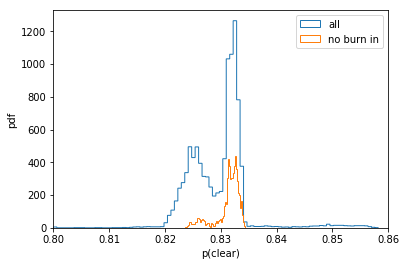

In [15]:
#For 1-D the "likelihood surface" is just a histogram.  For 2-D we'd have a contour plot.
from astroML.plotting import hist as fancyhist
fancyhist(pclearall, bins="freedman", histtype="step", label="all")
fancyhist(pclearall[4000:], bins="freedman", histtype="step", label="no burn in")
plt.legend()
plt.xlim(0.80,0.86)
plt.xlabel("p(clear)")
plt.ylabel("pdf")
plt.savefig('ChainHist.png')